## H2O MOJO Tree Visualization
You must have the following installed in your machine:
1. GraphViz (OSX: brew install graphviz)
2. subprocess (pip install subprocess

Content:
 - Detailed Blog: https://aichamp.wordpress.com/2017/09/27/visualizing-h2o-gbm-and-random-forest-mojo-models-trees-in-python/
 - Detailed Documentation: http://docs.h2o.ai/h2o/latest-stable/h2o-genmodel/javadoc/overview-summary.html#viewing-a-mojo

In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_151"; Java(TM) SE Runtime Environment (build 1.8.0_151-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.151-b12, mixed mode)
  Starting server from /home/yannick/bin/anaconda3/envs/py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptcbyv4i0
  JVM stdout: /tmp/tmptcbyv4i0/h2o_yannick_started_from_python.out
  JVM stderr: /tmp/tmptcbyv4i0/h2o_yannick_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,"28 days, 15 hours and 34 minutes"
H2O cluster name:,H2O_from_python_yannick_5855q3
H2O cluster total nodes:,1
H2O cluster free memory:,3.476 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [3]:
df = h2o.import_file('prostate.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
y = 'CAPSULE'
x = df.col_names
x.remove(y)

In [5]:
print("Response  : " + y)
print("Predictors: " + str(x))

Response  : CAPSULE
Predictors: ['ID', 'AGE', 'RACE', 'DPROS', 'DCAPS', 'PSA', 'VOL', 'GLEASON']


In [6]:
df[y] = df[y].asfactor()

In [7]:
df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,enum,int,int,int,int,real,real,int
mins,1.0,,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,,66.03947368421049,1.0868421052631572,2.2710526315789488,1.1078947368421048,15.408631578947375,15.812921052631573,6.3842105263157904
maxs,380.0,,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.84079387914127,,6.527071269173311,0.3087732580252793,1.0001076181502861,0.3106564493514939,19.99757266856046,18.347619967271175,1.0919533744261092
zeros,0,,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [8]:
train, valid, test = df.split_frame(ratios=[.8,.1])

In [9]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [10]:
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3, ntrees=5)

In [11]:
gbm_cv3.train(x=x, y=y, training_frame=train, validation_frame= valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [12]:
gbm_cv3.predict(test_data=test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.524741,0.475259
1,0.430591,0.569409
0,0.752185,0.247815
1,0.431545,0.568455
0,0.731936,0.268064
1,0.423531,0.576469
0,0.53755,0.46245
0,0.524968,0.475032
0,0.751756,0.248244
0,0.666756,0.333244


In [13]:
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Total cross validation models: 3


In [14]:
# This is how you get the model ID for the Cross Validation models
print(all_models[0].model_id)
print(all_models[1].model_id)
print(all_models[2].model_id)

GBM_model_python_1510996284189_1_cv_1
GBM_model_python_1510996284189_1_cv_2
GBM_model_python_1510996284189_1_cv_3


In [15]:
gbm_cv3.params

{'balance_classes': {'actual': False, 'default': False},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'class_sampling_factors': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_change_per_level': {'actual': 1.0, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 1.0, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'histogram_type': {'actual': 'AUTO', 'default': 'AUTO'},
 'huber_alpha': {'actual': 0.9, 'default': 0.9},
 'ignore_const_cols': {'actual': True, 'default': True},
 'ignored_columns': {'actual': None, 'default': None},
 'keep_cross_vali

In [16]:
gbm_cv3.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.20839798316653085
RMSE: 0.4565062794382251
LogLoss: 0.6043775299929659
Mean Per-Class Error: 0.21052631578947367
AUC: 0.8736842105263157
Gini: 0.7473684210526315
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28654502947655797: 


,0,1,Error,Rate
0,8.0,7.0,0.4667,(7.0/15.0)
1,0.0,19.0,0.0,(0.0/19.0)
Total,8.0,26.0,0.2059,(7.0/34.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2865450,0.8444444,23.0
max f2,0.2865450,0.9313725,23.0
max f0point5,0.4895735,0.8730159,9.0
max accuracy,0.3441431,0.7941176,19.0
max precision,0.6079689,1.0,0.0
max recall,0.2865450,1.0,23.0
max specificity,0.6079689,1.0,0.0
max absolute_mcc,0.2865450,0.6242945,23.0
max min_per_class_accuracy,0.4167720,0.7333333,15.0
max mean_per_class_accuracy,0.4895735,0.7894737,9.0


Gains/Lift Table: Avg response rate: 55,88 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0294118,0.5975740,1.7894737,1.7894737,1.0,1.0,0.0526316,0.0526316,78.9473684,78.9473684
,2,0.0294118,0.5871792,0.0,1.7894737,0.0,1.0,0.0,0.0526316,-100.0,78.9473684
,3,0.0294118,0.5767843,0.0,1.7894737,0.0,1.0,0.0,0.0526316,-100.0,78.9473684
,4,0.0588235,0.5742100,1.7894737,1.7894737,1.0,1.0,0.0526316,0.1052632,78.9473684,78.9473684
,5,0.0588235,0.5718800,0.0,1.7894737,0.0,1.0,0.0,0.1052632,-100.0,78.9473684
,6,0.1176471,0.5630201,1.7894737,1.7894737,1.0,1.0,0.1052632,0.2105263,78.9473684,78.9473684
,7,0.1470588,0.5479348,1.7894737,1.7894737,1.0,1.0,0.0526316,0.2631579,78.9473684,78.9473684
,8,0.2058824,0.5429364,1.7894737,1.7894737,1.0,1.0,0.1052632,0.3684211,78.9473684,78.9473684
,9,0.2941176,0.4910771,1.7894737,1.7894737,1.0,1.0,0.1578947,0.5263158,78.9473684,78.9473684
,10,0.4117647,0.4752138,0.8947368,1.5338346,0.5,0.8571429,0.1052632,0.6315789,-10.5263158,53.3834586


In [17]:
mojo_file_name = "/tmp/my_gbm_mojo.zip"
gbm_cv3.download_mojo(mojo_file_name)

'/tmp/my_gbm_mojo.zip'

In [18]:
import subprocess
from IPython.display import Image

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java",  "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i",  mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else:    
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")
        

# -------------------        
# I had to do in 2 steps. If I put all in 1 step the process hung after graphviz is created. Still investigating
# -------------------
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")
    
#Call above function with various parameters  

In [19]:
tmp = '/tmp/'

h2o_jar_path= '/home/yannick/bin/anaconda3/envs/py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = tmp + "my_gbm_graph.gv"
image_file_name = tmp + "my_gbm_tree"
# Based on Tree ID the image file will have my_gbm_tree_ID.png file name

In [20]:
# Note just change the tree id in the function below to get which particular tree you want
generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 3)

Success: Graphviz file /tmp/my_gbm_graph.gv is generated.


In [21]:
generateTreeImage(gv_file_path, image_file_name,  3)
# Note: If this step hangs, you can look at "dot" active process in osx and try killing it

Success: Image File /tmp/my_gbm_tree_3.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/tmp/my_gbm_tree_3.png')


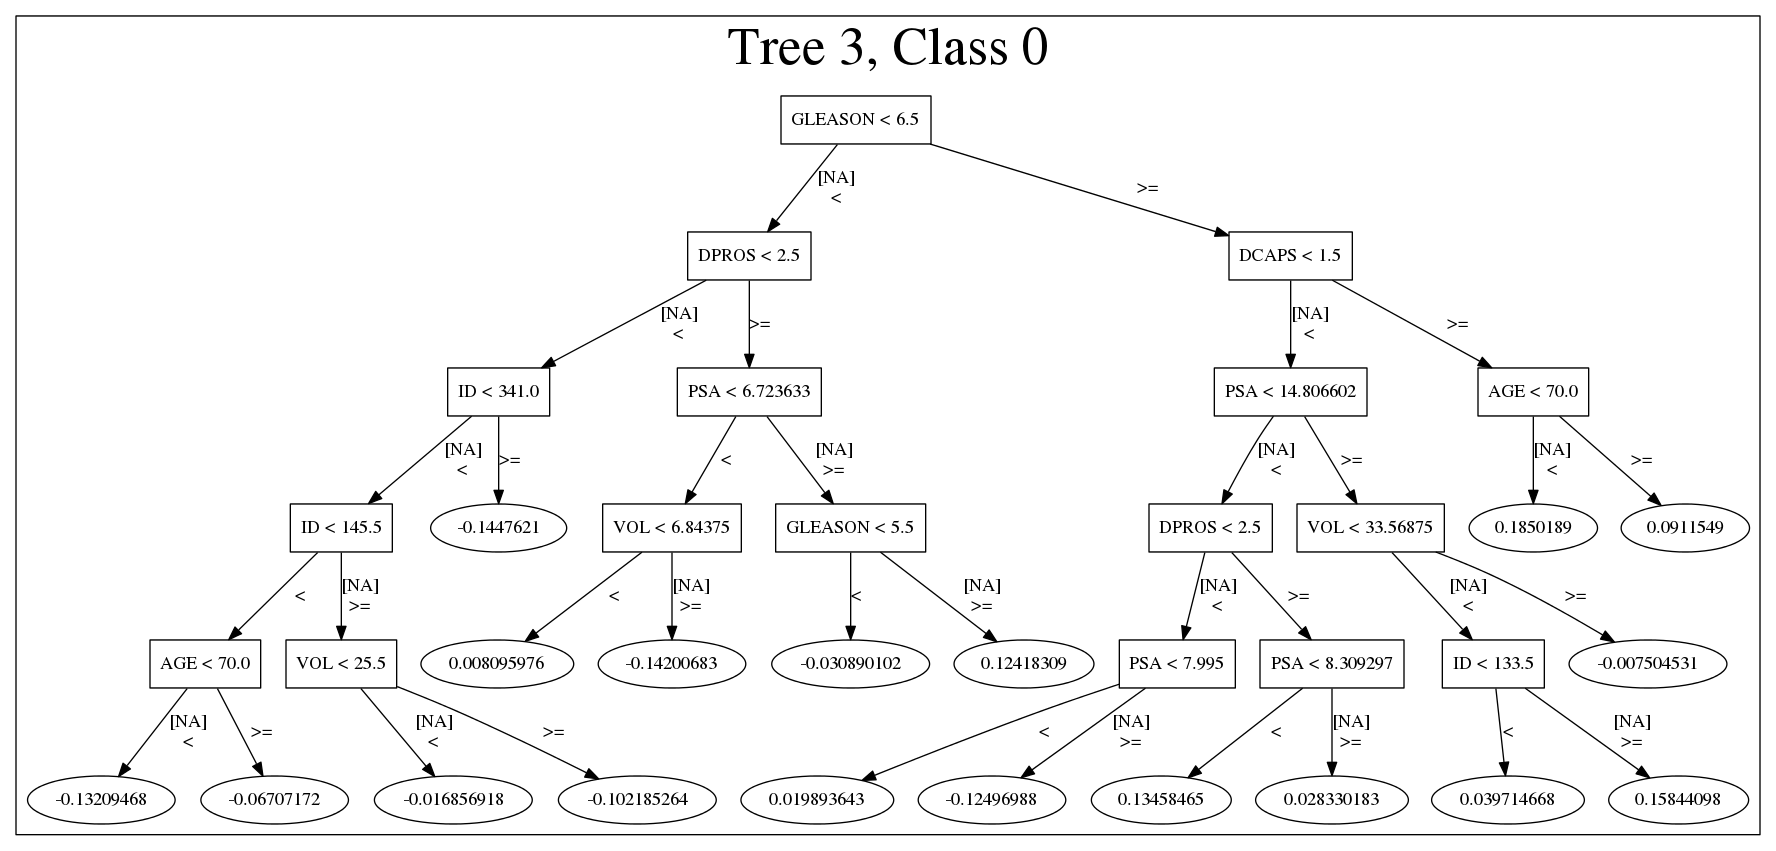

In [22]:
# Just pass the Tree Image file name depending on your tree
Image(filename=tmp + 'my_gbm_tree_3.png')

In [23]:
! head -n 50 /tmp/my_gbm_graph.gv

/*
Generated by:
    http://https://github.com/h2oai/h2o-3/tree/master/h2o-genmodel/src/main/java/hex/genmodel/tools/PrintMojo.java
*/

/*
On a mac:

$ brew install graphviz
$ dot -Tpng file.gv -o file.png
$ open file.png
*/

digraph G {

subgraph cluster_0 {
/* Nodes */

/* Level 0 */
{
"SG_0_Node_0" [shape=box,label="GLEASON < 6.5"]
}

/* Level 1 */
{
"SG_0_Node_1" [shape=box,label="DPROS < 2.5"]
"SG_0_Node_2" [shape=box,label="DCAPS < 1.5"]
}

/* Level 2 */
{
"SG_0_Node_3" [shape=box,label="ID < 341.0"]
"SG_0_Node_4" [shape=box,label="PSA < 6.723633"]
"SG_0_Node_5" [shape=box,label="PSA < 14.806602"]
"SG_0_Node_6" [shape=box,label="AGE < 70.0"]
}

/* Level 3 */
{
"SG_0_Node_7" [shape=box,label="ID < 145.5"]
"SG_0_Node_35" [label="-0.1447621"]
"SG_0_Node_9" [shape=box,label="VOL < 6.84375"]
"SG_0_Node_10" [shape=box,label="GLEASON < 5.5"]
"SG_0_Node_11" [shape=box,label="DPROS < 2.5"]
"SG_0_Node_12" [shape=box,label="VOL < 33.56875"]
"SG_0_Node_36" [label="0.1850189"]
"SG_0_Node_37" 